In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les 5 datasets
demographics = pd.read_excel('../data/Full/Telco_customer_churn_demographics.xlsx')
location = pd.read_excel('../data/Full/Telco_customer_churn_location.xlsx')
population = pd.read_excel('../data/Full/Telco_customer_churn_population.xlsx')
services = pd.read_excel('../data/Full/Telco_customer_churn_services.xlsx')
status = pd.read_excel('../data/Full/Telco_customer_churn_status.xlsx')

print("Demographics:", demographics.shape)
print("Location:", location.shape)
print("Population:", population.shape)
print("Services:", services.shape)
print("Status:", status.shape)

Demographics: (7043, 9)
Location: (7043, 9)
Population: (1671, 3)
Services: (7043, 30)
Status: (7043, 11)


In [2]:
print("Demographics:", demographics.head())
print("Location:", location.head())
print("Population:", population.head())
print("Services:", services.head())
print("Status:", status.head())

Demographics:   Customer ID  Count  Gender  Age Under 30 Senior Citizen Married Dependents  \
0  8779-QRDMV      1    Male   78       No            Yes      No         No   
1  7495-OOKFY      1  Female   74       No            Yes     Yes        Yes   
2  1658-BYGOY      1    Male   71       No            Yes      No        Yes   
3  4598-XLKNJ      1  Female   78       No            Yes     Yes        Yes   
4  4846-WHAFZ      1  Female   80       No            Yes     Yes        Yes   

   Number of Dependents  
0                     0  
1                     1  
2                     3  
3                     1  
4                     1  
Location:   Customer ID  Count        Country       State         City  Zip Code  \
0  8779-QRDMV      1  United States  California  Los Angeles     90022   
1  7495-OOKFY      1  United States  California  Los Angeles     90063   
2  1658-BYGOY      1  United States  California  Los Angeles     90065   
3  4598-XLKNJ      1  United States  Califo

In [3]:
# checking for MISSING VALUES

print("Demographics:", demographics.isnull().sum().sum())
print("Location:", location.isnull().sum().sum())
print("Services:", services.isnull().sum().sum())
print("Status:", status.isnull().sum().sum())


Demographics: 0
Location: 0
Services: 5403
Status: 10348


In [4]:
print(services.isnull().sum()[services.isnull().sum() > 0])

Offer            3877
Internet Type    1526
dtype: int64


In [5]:
print(status.isnull().sum()[status.isnull().sum() > 0])

Churn Category    5174
Churn Reason      5174
dtype: int64


In [6]:
print("Total clients:", len(status))
print("Clients avec Churn = No:", (status['Churn Label'] == 'No').sum())
print("Missing Churn Reason:", status['Churn Reason'].isnull().sum())

Total clients: 7043
Clients avec Churn = No: 5174
Missing Churn Reason: 5174


In [7]:
total_clients = len(status)
churned_clients = (status['Churn Label'] == 'Yes').sum()
churn_rate = (churned_clients / total_clients) * 100

print(f"Total clients: {total_clients}")
print(f"Churned: {churned_clients}")
print(f"Stayed: {total_clients - churned_clients}")
print(f"Churn Rate: {churn_rate:.2f}%")

Total clients: 7043
Churned: 1869
Stayed: 5174
Churn Rate: 26.54%


In [8]:
services['Offer'].fillna('No Offer', inplace=True)
print(services['Offer'].value_counts())


Offer
No Offer    3877
Offer B      824
Offer E      805
Offer D      602
Offer A      520
Offer C      415
Name: count, dtype: int64


/var/folders/6v/ktg6tyl56y5g_fj8m8457lhr0000gn/T/ipykernel_83358/3317427120.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  services['Offer'].fillna('No Offer', inplace=True)


In [9]:
print(services.columns.tolist())

['Customer ID', 'Count', 'Quarter', 'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Avg Monthly GB Download', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue']


In [10]:
print(services['Internet Service'].value_counts())

Internet Service
Yes    5517
No     1526
Name: count, dtype: int64


In [11]:
services['Internet Type'] = services['Internet Type'].fillna('No Internet')
print(services['Internet Type'].value_counts())

Internet Type
Fiber Optic    3035
DSL            1652
No Internet    1526
Cable           830
Name: count, dtype: int64


In [12]:
print("\nDemographics:", demographics.isnull().sum().sum())
print("Location:", location.isnull().sum().sum())
print("Services:", services.isnull().sum().sum())
print("Status:", status.isnull().sum().sum())


Demographics: 0
Location: 0
Services: 0
Status: 10348


In [13]:
print(status.isnull().sum()[status.isnull().sum() > 0])

Churn Category    5174
Churn Reason      5174
dtype: int64


In [14]:
# Sauvegarde les datasets nettoyés
demographics.to_csv('demographics_clean.csv', index=False)
location.to_csv('location_clean.csv', index=False)
population.to_csv('population_clean.csv', index=False)
services.to_csv('services_clean.csv', index=False)
status.to_csv('status_clean.csv', index=False)

In [15]:
demographics.describe()

,Count,Age,Number of Dependents
count,7043.0,7043.000000,7043.000000
mean,1.0,46.509726,0.468692
std,0.0,16.750352,0.962802
min,1.0,19.000000,0.000000
25%,1.0,32.000000,0.000000
50%,1.0,46.000000,0.000000
75%,1.0,60.000000,0.000000
max,1.0,80.000000,9.000000


In [16]:
services.describe()

,Count,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,0.0,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,1.0,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,1.0,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,1.0,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,1.0,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,1.0,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [17]:
status.describe()

,Count,Satisfaction Score,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,3.244924,0.265370,58.505040,4400.295755
std,0.0,1.201657,0.441561,21.170031,1183.057152
min,1.0,1.000000,0.000000,5.000000,2003.000000
25%,1.0,3.000000,0.000000,40.000000,3469.000000
50%,1.0,3.000000,0.000000,61.000000,4527.000000
75%,1.0,4.000000,1.000000,75.500000,5380.500000
max,1.0,5.000000,1.000000,96.000000,6500.000000


In [18]:
print(demographics['Gender'].value_counts())
print(demographics['Senior Citizen'].value_counts())
print(services['Contract'].value_counts())
print(services['Internet Service'].value_counts())
print(services['Payment Method'].value_counts())

Gender
Male      3555
Female    3488
Name: count, dtype: int64
Senior Citizen
No     5901
Yes    1142
Name: count, dtype: int64
Contract
Month-to-Month    3610
Two Year          1883
One Year          1550
Name: count, dtype: int64
Internet Service
Yes    5517
No     1526
Name: count, dtype: int64
Payment Method
Bank Withdrawal    3909
Credit Card        2749
Mailed Check        385
Name: count, dtype: int64


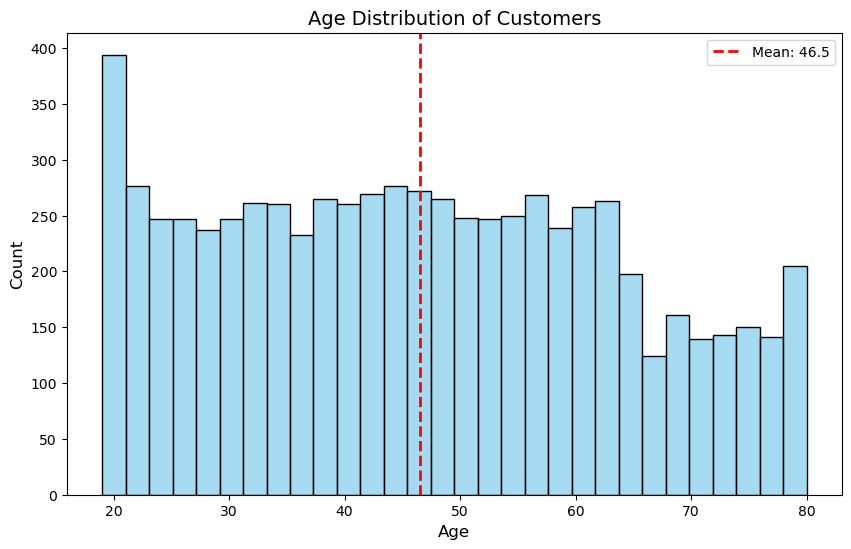

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. AGE DISTRIBUTION 
plt.figure(figsize=(10, 6))
sns.histplot(data=demographics, x='Age', bins=30, color='skyblue')
plt.axvline(demographics['Age'].mean(), color='red', linestyle='--', linewidth=2,
            label=f'Mean: {demographics["Age"].mean():.1f}')
plt.title('Age Distribution of Customers', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend()
plt.savefig('01_age_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

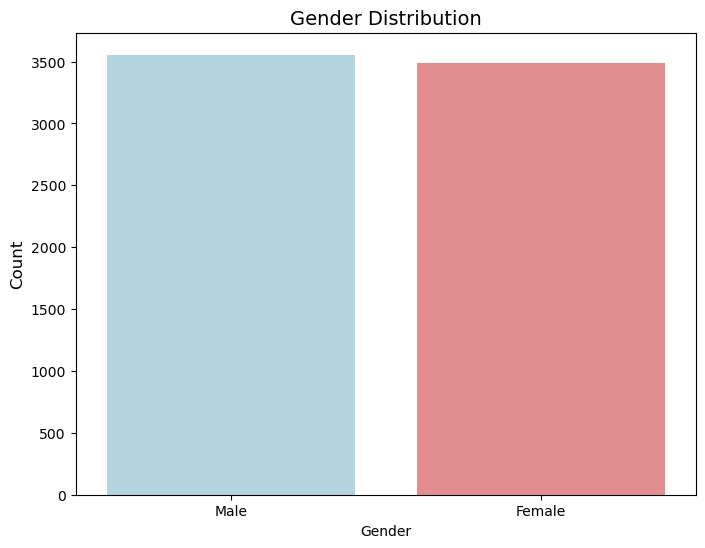

In [20]:
# 3.2 GENDER DISTRIBUTION
# ============================================
plt.figure(figsize=(8, 6))
sns.countplot(data=demographics, x='Gender', hue='Gender', palette=['lightblue', 'lightcoral'], legend=False)
plt.title('Gender Distribution', fontsize=14)
plt.ylabel('Count', fontsize=12)
plt.savefig('02_gender_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

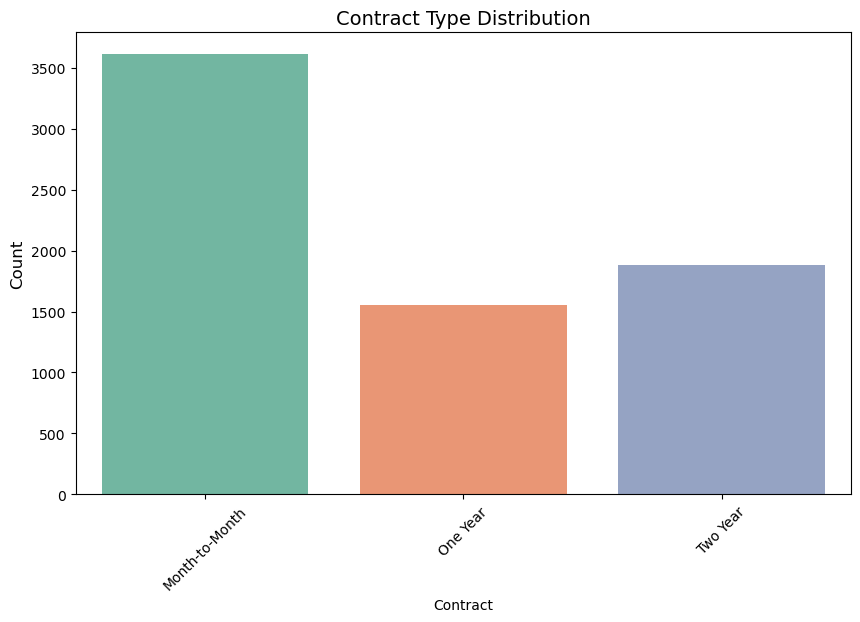

In [21]:
# 3.3 CONTRACT TYPE DISTRIBUTION
# ============================================
plt.figure(figsize=(10, 6))
sns.countplot(data=services, x='Contract', hue='Contract', palette='Set2', legend=False)
plt.title('Contract Type Distribution', fontsize=14)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.savefig('03_contract_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

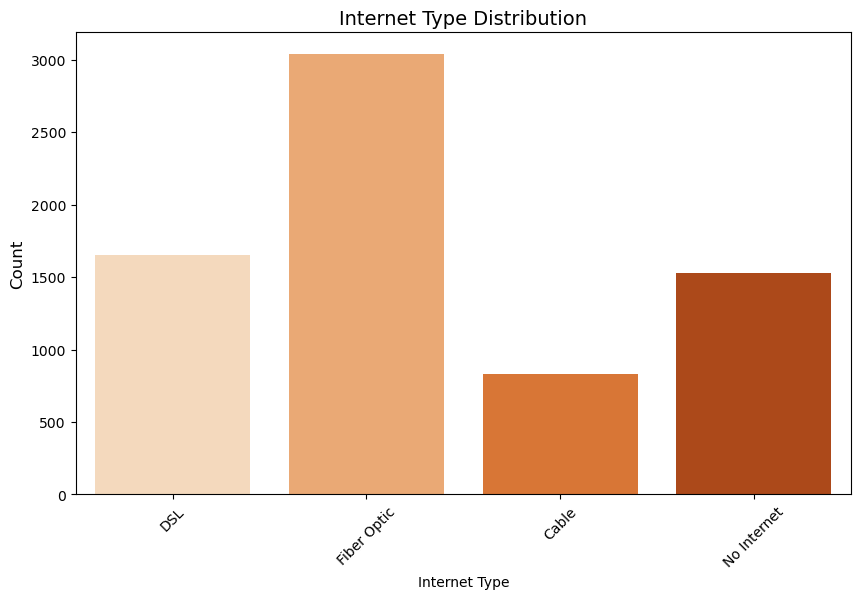

In [22]:
# 3.4 INTERNET SERVICE DISTRIBUTION

plt.figure(figsize=(10, 6))
sns.countplot(data=services, x='Internet Type', hue='Internet Type', palette='Oranges', legend=False)
plt.title('Internet Type Distribution', fontsize=14)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.savefig('04_internet_type_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

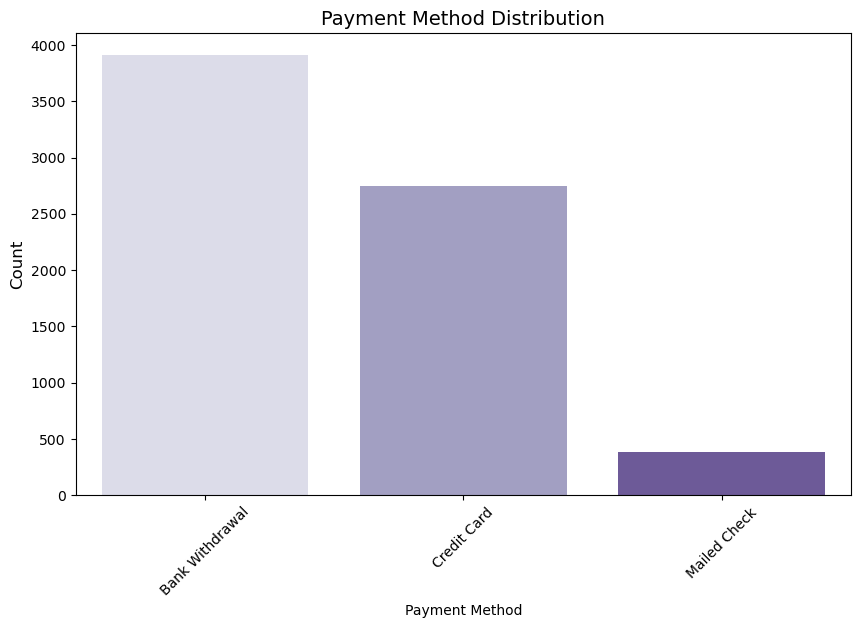

In [23]:
# 3.5 PAYMENT METHOD DISTRIBUTION
# ============================================
plt.figure(figsize=(10, 6))
sns.countplot(data=services, x='Payment Method', hue='Payment Method', palette='Purples', legend=False)
plt.title('Payment Method Distribution', fontsize=14)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.savefig('05_payment_method_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

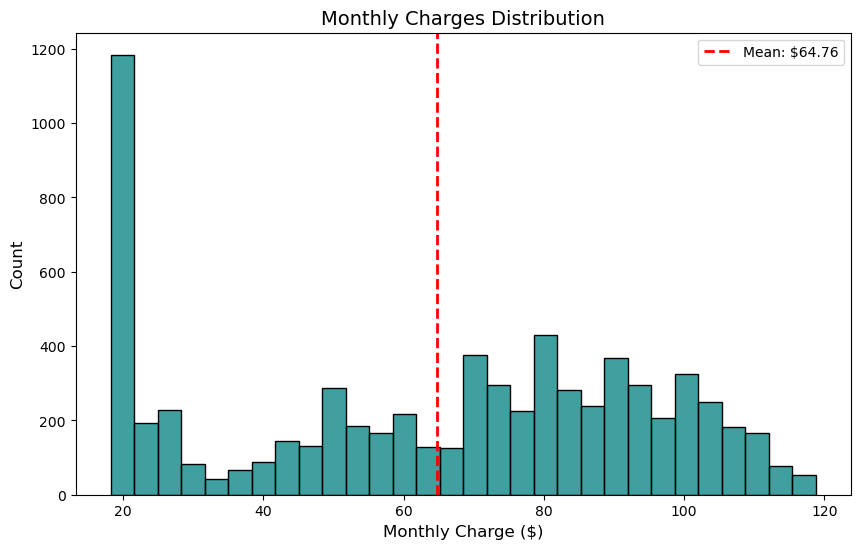

In [24]:
# 3.6 MONTHLY CHARGES DISTRIBUTION
# ============================================
plt.figure(figsize=(10, 6))
sns.histplot(data=services, x='Monthly Charge', bins=30, color='teal')
plt.axvline(services['Monthly Charge'].mean(), color='red', linestyle='--', linewidth=2,
            label=f'Mean: ${services["Monthly Charge"].mean():.2f}')
plt.title('Monthly Charges Distribution', fontsize=14)
plt.xlabel('Monthly Charge ($)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend()
plt.savefig('06_monthly_charges_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

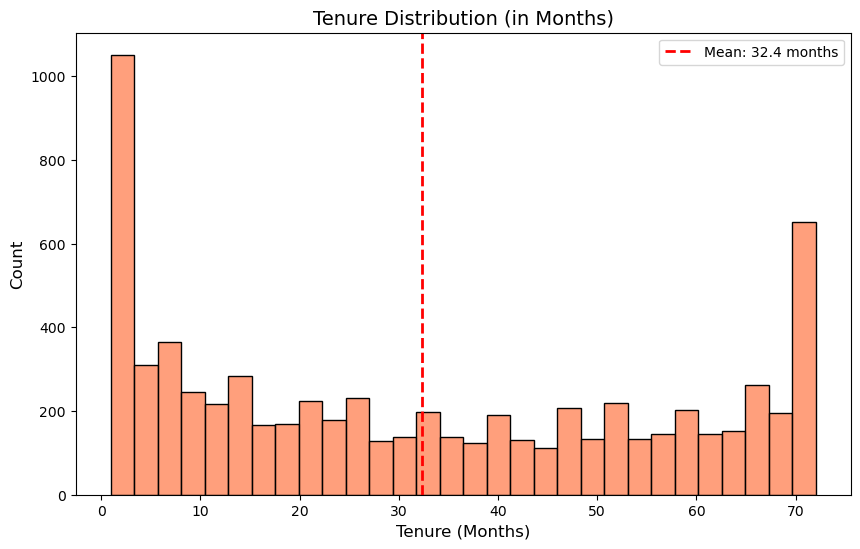

In [25]:
# 3.7 TENURE DISTRIBUTION
# ============================================
plt.figure(figsize=(10, 6))
sns.histplot(data=services, x='Tenure in Months', bins=30, color='coral')
plt.axvline(services['Tenure in Months'].mean(), color='red', linestyle='--', linewidth=2,
            label=f'Mean: {services["Tenure in Months"].mean():.1f} months')
plt.title('Tenure Distribution (in Months)', fontsize=14)
plt.xlabel('Tenure (Months)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend()
plt.savefig('07_tenure_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

churn_data = services.merge(status[['Customer ID', 'Churn Value', 'Churn Label']], on='Customer ID')
churn_demo = demographics.merge(status[['Customer ID', 'Churn Value']], on='Customer ID')


In [27]:
# 08. CHURN RATE BY CONTRACT TYPE
churn_by_contract = churn_data.groupby('Contract')['Churn Value'].agg(['mean', 'count'])
churn_by_contract['churn_rate_%'] = churn_by_contract['mean'] * 100
print(churn_by_contract)

                    mean  count  churn_rate_%
Contract                                     
Month-to-Month  0.458449   3610     45.844875
One Year        0.107097   1550     10.709677
Two Year        0.025491   1883      2.549124


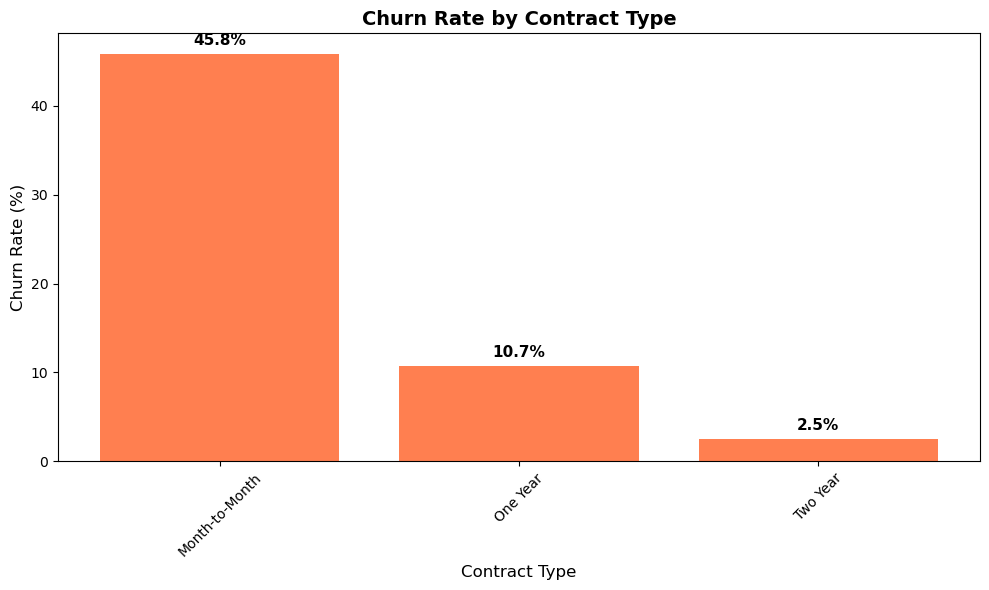

In [28]:
plt.figure(figsize=(10, 6))
bars = plt.bar(churn_by_contract.index, churn_by_contract['churn_rate_%'], color='coral')
plt.title('Churn Rate by Contract Type', fontsize=14, fontweight='bold')
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.xlabel('Contract Type', fontsize=12)
plt.xticks(rotation=45)
for i, (idx, row) in enumerate(churn_by_contract.iterrows()):
    plt.text(i, row['churn_rate_%'] + 1, f'{row["churn_rate_%"]:.1f}%', 
             ha='center', fontweight='bold', fontsize=11)
plt.tight_layout()
plt.savefig('08_churn_by_contract.png', dpi=300, bbox_inches='tight')
plt.show()

                   mean  count  churn_rate_%
Internet Type                               
Cable          0.256627    830     25.662651
DSL            0.185835   1652     18.583535
Fiber Optic    0.407249   3035     40.724876
No Internet    0.074050   1526      7.404980


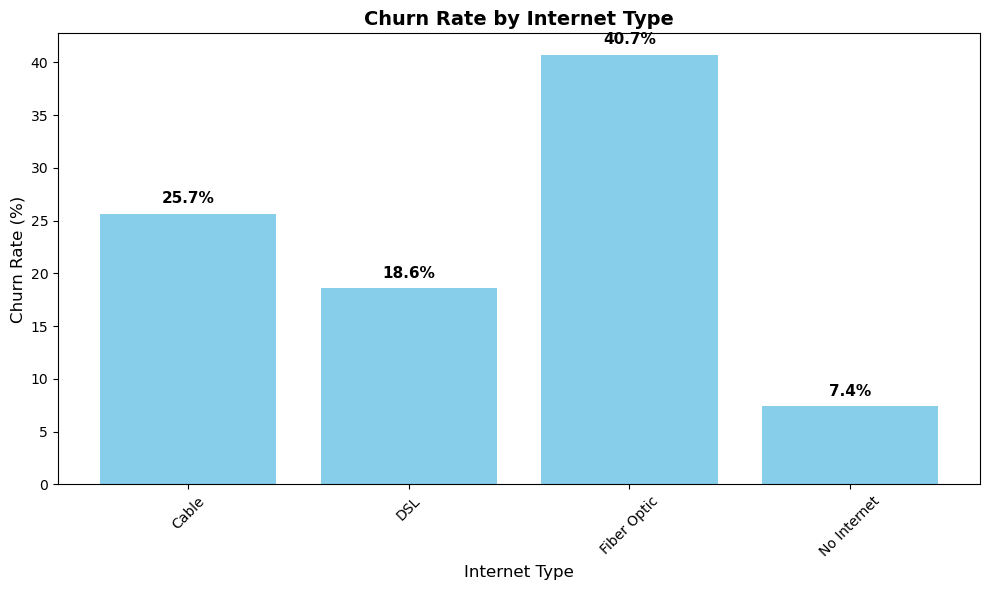

In [29]:
churn_by_internet = churn_data.groupby('Internet Type')['Churn Value'].agg(['mean', 'count'])
churn_by_internet['churn_rate_%'] = churn_by_internet['mean'] * 100
print(churn_by_internet)

plt.figure(figsize=(10, 6))
bars = plt.bar(churn_by_internet.index, churn_by_internet['churn_rate_%'], color='skyblue')
plt.title('Churn Rate by Internet Type', fontsize=14, fontweight='bold')
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.xlabel('Internet Type', fontsize=12)
plt.xticks(rotation=45)
for i, (idx, row) in enumerate(churn_by_internet.iterrows()):
    plt.text(i, row['churn_rate_%'] + 1, f'{row["churn_rate_%"]:.1f}%', 
             ha='center', fontweight='bold', fontsize=11)
plt.tight_layout()
plt.savefig('09_churn_by_internet.png', dpi=300, bbox_inches='tight')
plt.show()


=== CHURN RATE BY INTERNET TYPE ===
                   mean  count  churn_rate_%
Internet Type                               
Cable          0.256627    830     25.662651
DSL            0.185835   1652     18.583535
Fiber Optic    0.407249   3035     40.724876
No Internet    0.074050   1526      7.404980


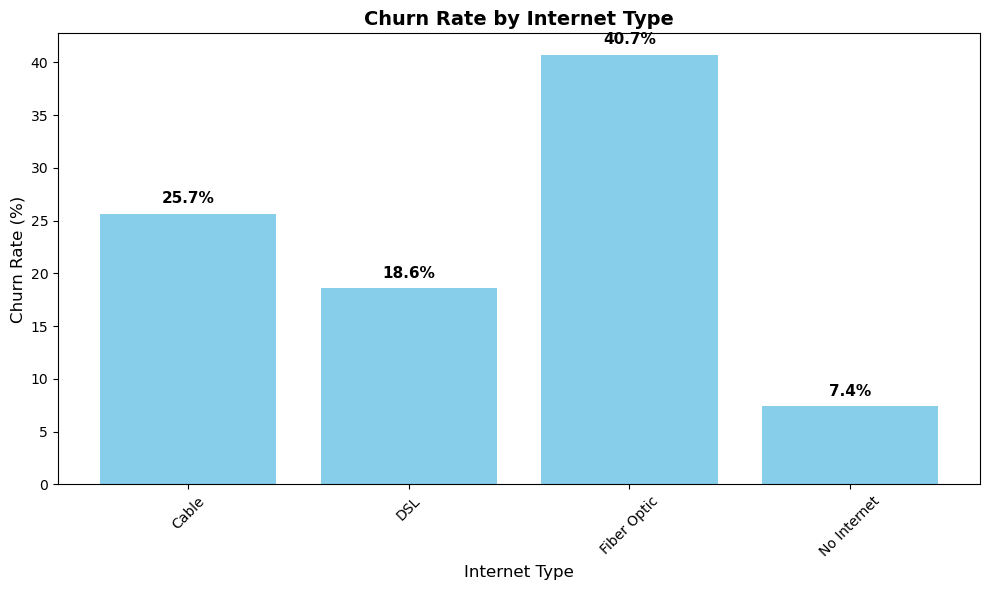

In [30]:
# 09. CHURN RATE BY INTERNET TYPE

print("\n=== CHURN RATE BY INTERNET TYPE ===")
churn_by_internet = churn_data.groupby('Internet Type')['Churn Value'].agg(['mean', 'count'])
churn_by_internet['churn_rate_%'] = churn_by_internet['mean'] * 100
print(churn_by_internet)

plt.figure(figsize=(10, 6))
bars = plt.bar(churn_by_internet.index, churn_by_internet['churn_rate_%'], color='skyblue')
plt.title('Churn Rate by Internet Type', fontsize=14, fontweight='bold')
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.xlabel('Internet Type', fontsize=12)
plt.xticks(rotation=45)
for i, (idx, row) in enumerate(churn_by_internet.iterrows()):
    plt.text(i, row['churn_rate_%'] + 1, f'{row["churn_rate_%"]:.1f}%', 
             ha='center', fontweight='bold', fontsize=11)
plt.tight_layout()
plt.savefig('09_churn_by_internet.png', dpi=300, bbox_inches='tight')
plt.show()


=== CHURN RATE BY PAYMENT METHOD ===
                     mean  count  churn_rate_%
Payment Method                                
Mailed Check     0.368831    385     36.883117
Bank Withdrawal  0.339985   3909     33.998465
Credit Card      0.144780   2749     14.477992


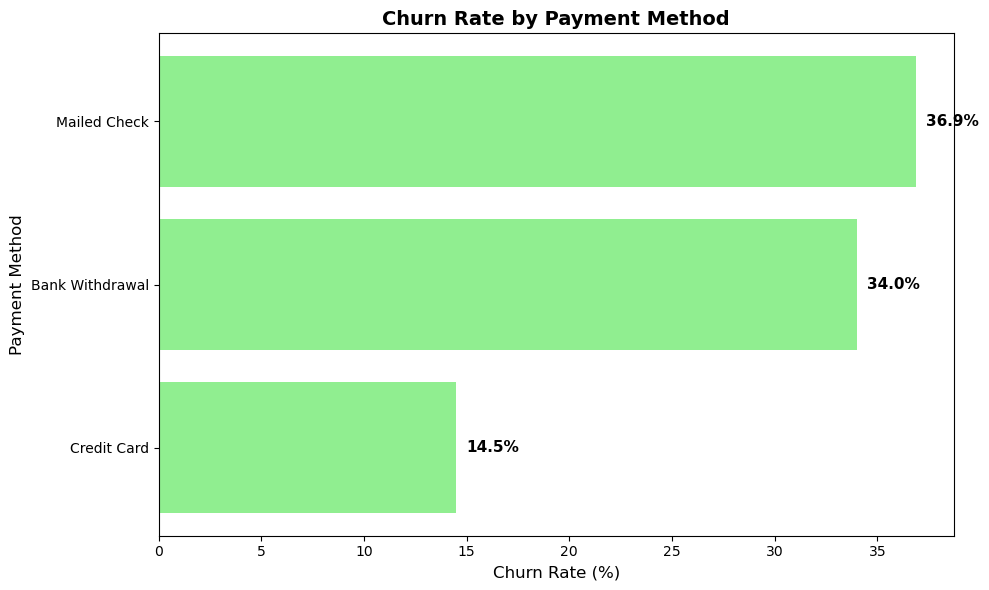

In [31]:
# 10. CHURN RATE BY PAYMENT METHOD

print("\n=== CHURN RATE BY PAYMENT METHOD ===")
churn_by_payment = churn_data.groupby('Payment Method')['Churn Value'].agg(['mean', 'count'])
churn_by_payment['churn_rate_%'] = churn_by_payment['mean'] * 100
print(churn_by_payment.sort_values('churn_rate_%', ascending=False))

plt.figure(figsize=(10, 6))
sorted_payment = churn_by_payment.sort_values('churn_rate_%')
plt.barh(range(len(sorted_payment)), sorted_payment['churn_rate_%'], color='lightgreen')
plt.yticks(range(len(sorted_payment)), sorted_payment.index)
plt.title('Churn Rate by Payment Method', fontsize=14, fontweight='bold')
plt.xlabel('Churn Rate (%)', fontsize=12)
plt.ylabel('Payment Method', fontsize=12)
for i, (idx, row) in enumerate(sorted_payment.iterrows()):
    plt.text(row['churn_rate_%'] + 0.5, i, f'{row["churn_rate_%"]:.1f}%', 
             va='center', fontweight='bold', fontsize=11)
plt.tight_layout()
plt.savefig('10_churn_by_payment.png', dpi=300, bbox_inches='tight')
plt.show()


=== CHURN RATE BY SENIOR CITIZEN ===
                    mean  count  churn_rate_%
Senior Citizen                               
No              0.236062   5901     23.606168
Yes             0.416813   1142     41.681261


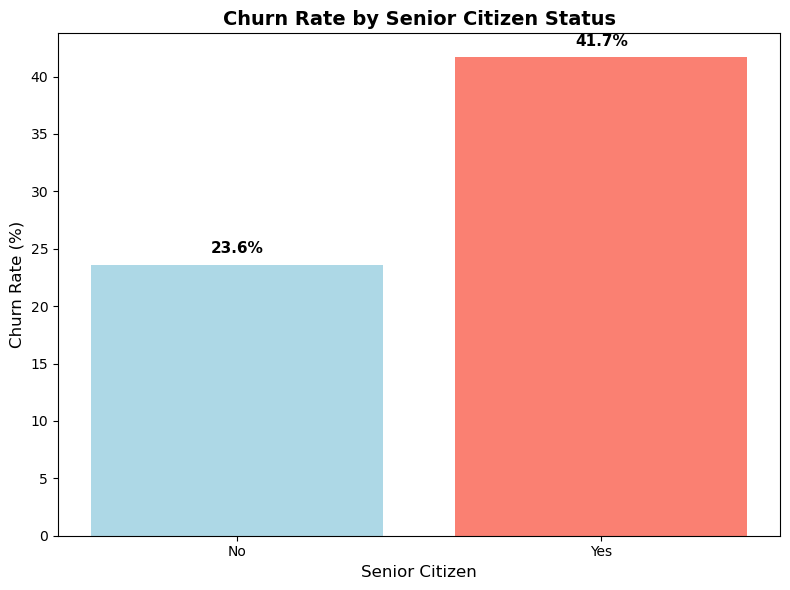

In [32]:
# 11. CHURN RATE BY SENIOR CITIZEN
# ============================================
print("\n=== CHURN RATE BY SENIOR CITIZEN ===")
churn_by_senior = churn_demo.groupby('Senior Citizen')['Churn Value'].agg(['mean', 'count'])
churn_by_senior['churn_rate_%'] = churn_by_senior['mean'] * 100
print(churn_by_senior)

plt.figure(figsize=(8, 6))
bars = plt.bar(churn_by_senior.index, churn_by_senior['churn_rate_%'], 
               color=['lightblue', 'salmon'])
plt.title('Churn Rate by Senior Citizen Status', fontsize=14, fontweight='bold')
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.xlabel('Senior Citizen', fontsize=12)
plt.xticks(rotation=0)
for i, (idx, row) in enumerate(churn_by_senior.iterrows()):
    plt.text(i, row['churn_rate_%'] + 1, f'{row["churn_rate_%"]:.1f}%', 
             ha='center', fontweight='bold', fontsize=11)
plt.tight_layout()
plt.savefig('11_churn_by_senior.png', dpi=300, bbox_inches='tight')
plt.show()

In [33]:
print(f"• Highest churn contract: {churn_by_contract['churn_rate_%'].idxmax()} ({churn_by_contract['churn_rate_%'].max():.1f}%)")
print(f"• Highest churn internet: {churn_by_internet['churn_rate_%'].idxmax()} ({churn_by_internet['churn_rate_%'].max():.1f}%)")
print(f"• Highest churn payment: {churn_by_payment['churn_rate_%'].idxmax()} ({churn_by_payment['churn_rate_%'].max():.1f}%)")

• Highest churn contract: Month-to-Month (45.8%)
• Highest churn internet: Fiber Optic (40.7%)
• Highest churn payment: Mailed Check (36.9%)


In [34]:
# PARTIE 5 : MASTER DATASET
# Add unique suffixes for each merge to avoid duplicate column names
master = demographics.merge(location, on='Customer ID', suffixes=('', '_loc'))
master = master.merge(services, on='Customer ID', suffixes=('', '_serv'))
master = master.merge(status, on='Customer ID', suffixes=('', '_stat'))

print(f"Master dataset: {master.shape}")
master.to_csv('telco_master_dataset.csv', index=False)

Master dataset: (7043, 56)


In [35]:
import pandas as pd  # Make sure pandas is imported

# First view the DataFrame
master.head()

# Then set the display option using pd.set_option, not as a DataFrame method
pd.set_option('display.max_columns', None)  # This affects all pandas DataFrames, not just 'master'

In [36]:
master.head()

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Count_loc,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Count_serv,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Count_stat,Quarter_stat,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,1,Q3,No,0,1,No Offer,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,1,Q3,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1,1,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237,1,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,1,Q3,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3,1,United States,California,Los Angeles,90065,"34.108833, -118.229715",34.108833,-118.229715,1,Q3,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,1,Q3,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1,1,United States,California,Inglewood,90303,"33.936291, -118.332639",33.936291,-118.332639,1,Q3,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,1,Q3,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1,1,United States,California,Whittier,90602,"33.972119, -118.020188",33.972119,-118.020188,1,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,1,Q3,2,Churned,Yes,1,67,2793,Price,Extra data charges


In [37]:
master['Churn Category'].value_counts()

Churn Category
Competitor         841
Attitude           314
Dissatisfaction    303
Price              211
Other              200
Name: count, dtype: int64

In [38]:
master['Churn Reason'].value_counts()

Churn Reason
Competitor had better devices                313
Competitor made better offer                 311
Attitude of support person                   220
Don't know                                   130
Competitor offered more data                 117
Competitor offered higher download speeds    100
Attitude of service provider                  94
Price too high                                78
Product dissatisfaction                       77
Network reliability                           72
Long distance charges                         64
Service dissatisfaction                       63
Moved                                         46
Extra data charges                            39
Limited range of services                     37
Poor expertise of online support              31
Lack of affordable download/upload speed      30
Lack of self-service on Website               29
Poor expertise of phone support               12
Deceased                                       6
Name: c

In [39]:
master.to_csv('telco_master_dataset.csv', index=False)

In [40]:
# Liste des Zip Codes uniques dans tes données
zip_codes = location['Zip Code'].unique()
print(f"Nombre de Zip Codes: {len(zip_codes)}")
print(f"Top 20 Zip Codes:")
print(location['Zip Code'].value_counts().head(20))

# Sauvegarder la liste
import pandas as pd
zip_df = pd.DataFrame({'Zip Code': zip_codes})
zip_df.to_csv('california_zip_codes.csv', index=False)

Nombre de Zip Codes: 1626
Top 20 Zip Codes:
Zip Code
92028    43
92027    38
92122    36
92117    34
92126    32
92592    30
92109    27
92130    22
92121    20
92129    16
91773     8
90712     7
91605     6
90028     6
90503     5
90270     5
90266     5
91011     5
90249     5
90723     5
Name: count, dtype: int64


In [41]:
import requests
import bs4  # Import the package as bs4, not beautifulsoup4
from bs4 import BeautifulSoup
import time
import pandas as pd

In [42]:
import requests

# Test Census API
zip_code = "90022"
api_url = "https://api.census.gov/data/2020/acs/acs5"

# Variables to find:
# B19013_001E = Median Household Income
# B17001_002E = Population below poverty level
# B23025_005E = Unemployed population

params = {
    'get': 'NAME,B19013_001E,B17001_002E,B23025_005E',
    'for': f'zip code tabulation area:{zip_code}'
}

try:
    response = requests.get(api_url, params=params)
    print(f"Status: {response.status_code}")
    
    if response.status_code == 200:
        data = response.json()
        print("Census API works!")
        print(data)
    else:
        print(f"Error: {response.status_code}")
        
except Exception as e:
    print(f"Error: {e}")

Status: 200
Census API works!
[['NAME', 'B19013_001E', 'B17001_002E', 'B23025_005E', 'zip code tabulation area'], ['ZCTA5 90022', '51183', '11746', '2192', '90022']]


In [43]:
#sql import

# 1. customers_demographics
demo_export = demographics[['Customer ID', 'Gender', 'Age', 'Senior Citizen', 
                            'Married', 'Dependents', 'Number of Dependents']].copy()
demo_export.columns = ['customer_id', 'gender', 'age', 'senior_citizen', 
                       'married', 'dependents', 'number_of_dependents']
demo_export.to_csv('mysql_customers_demographics.csv', index=False)


# 2. zip_population
zip_export = population[['Zip Code', 'Population']].copy()
zip_export.columns = ['zip_code', 'population']
zip_export.to_csv('mysql_zip_population.csv', index=False)

# 3. customers_location
loc_export = location[['Customer ID', 'Country', 'State', 'City', 
                       'Zip Code', 'Latitude', 'Longitude']].copy()
loc_export.columns = ['customer_id', 'country', 'state', 'city', 
                      'zip_code', 'latitude', 'longitude']
loc_export.to_csv('mysql_customers_location.csv', index=False)

# 4. customers_services
serv_export = services[['Customer ID', 'Quarter', 'Tenure in Months', 'Phone Service',
                        'Internet Service', 'Internet Type', 'Contract', 'Payment Method',
                        'Monthly Charge', 'Total Charges']].copy()
serv_export.columns = ['customer_id', 'quarter', 'tenure_in_months', 'phone_service',
                       'internet_service', 'internet_type', 'contract', 'payment_method',
                       'monthly_charge', 'total_charges']
serv_export.to_csv('mysql_customers_services.csv', index=False)

# 5. customers_status
stat_export = status[['Customer ID', 'Satisfaction Score', 'Churn Label', 'Churn Value',
                      'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason']].copy()
stat_export.columns = ['customer_id', 'satisfaction_score', 'churn_label', 'churn_value',
                       'churn_score', 'cltv', 'churn_category', 'churn_reason']
stat_export.to_csv('mysql_customers_status.csv', index=False)